# SVM

***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [O efeito da margem](#o-efeito-da-margem)
3. [Outros kerneis](#outros-kerneis)

## Importando bibliotecas

In [69]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.svm import SVC, LinearSVC

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)
    plt.show()

# Extraído de https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(
        X, 
        Y, 
        P, 
        colors='k',
        levels=[-1, 0, 1], 
        alpha=0.5,
        linestyles=['--', '-', '--']
    )
    
    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, 
            linewidth=1, 
            facecolors='none'
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## O efeito da margem

A margem é a característica mais importante do SVM, ao invés de criar apenas uma linha separando duas classes, podemos usar uma margem. A margem é a distâncie entre a reta de classificação e as instâncias mais próximas de cada classe. Utilizando uma instância de cada classe como vetor de suporte, o algoritmo maximiza a margem entre esses dois vetores.

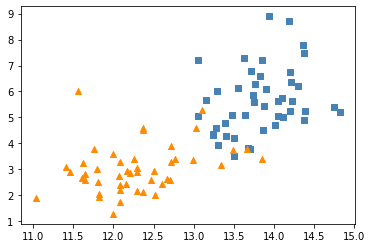

In [70]:
# carregando o dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# vamos escolher apenas classes do dataset
class_a = 0
class_b = 1
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]

# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# vamos observar as duas features
feature_0 = "alcohol"
feature_1 = "color_intensity"

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0, feature_1]], filtered_y, test_size=0.3, random_state=199)

plt.scatter(
    X_train[feature_0][class_0_instances],
    X_train[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    X_train[feature_0][class_1_instances], 
    X_train[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)


Vamos utilizar uma das implementações do SVM no _sklearn_, o SVC. Aqui conseguimos controlar a penalização por instância errada (_C_), quanto maior a penalização, menos instâncias devem estar presentes dentro da margem e menor deverá ser a distância entre os vetores de suporte. Vamos considerar por hora, o kernel linear.

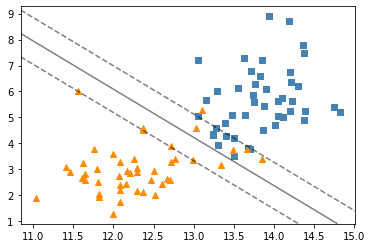

In [67]:
model = SVC(C=1, kernel="linear")
model.fit(X_train, y_train)

plt.scatter(
    X_train[feature_0][class_0_instances],
    X_train[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    X_train[feature_0][class_1_instances], 
    X_train[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)

plot_svc_decision_function(model)

A medida em que a penalização aumenta, os vetores de suporte serão as instâncias mais próximos da fronteira.

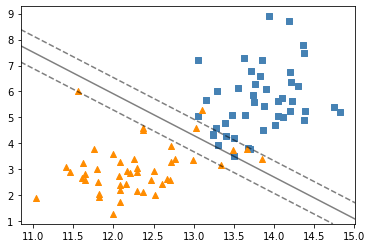

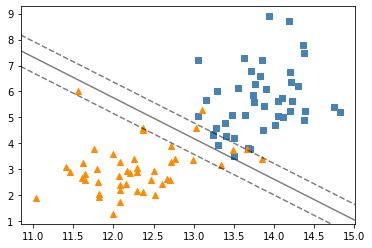

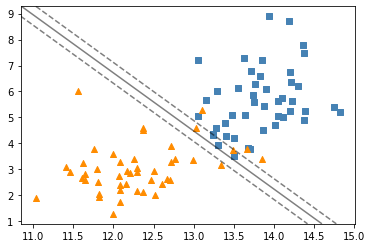

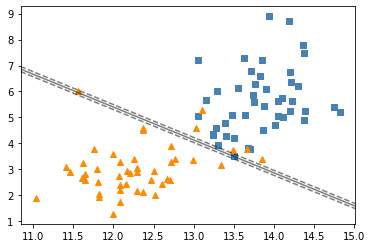

In [30]:
C = 1000
for _ in range(4):
    plt.figure()
    C *= 5
    model = SVC(C=C, kernel="linear")
    model.fit(X_train, y_train)

    plt.scatter(
        X_train[feature_0][class_0_instances],
        X_train[feature_1][class_0_instances], 
        c=colors[class_a], 
        marker=markers[class_a]
    )
    plt.scatter(
        X_train[feature_0][class_1_instances], 
        X_train[feature_1][class_1_instances], 
        c=colors[class_b], 
        marker=markers[class_b]
    )

    plot_svc_decision_function(model)
    plt.show()

Observe que quanto maior a regularização, maior a possibilidade do modelo ter overfit durante o treino.

## Outros kerneis

Agora, vamos observar como o SVM se comporta para dados não linearmente separáveis. Nesse caso, o algoritmo utiliza um kernel para mapear os dados em uma nova dimensão, com o objetivo de encontrar uma nova região linearmente separável no espaço de dimensão maior. Vale salientar que a escolha do kernel depende diretamente do problema em questão, portanto, essa escolha deve ser pensada com cuidado.

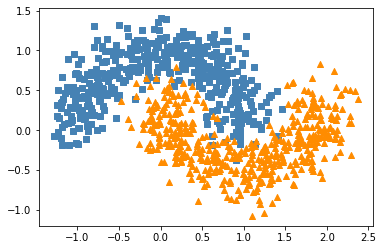

In [33]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap

# criação do dataset
X, y = make_moons(n_samples=900, noise=0.2, random_state=199)

# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# visualização do dataset
plt.scatter(
    X[y==0, 0],
    X[y==0, 1], 
    c=colors[0], 
    marker=markers[0]
)
plt.scatter(
    X[y==1, 0], 
    X[y==1, 1], 
    c=colors[1], 
    marker=markers[1]
)

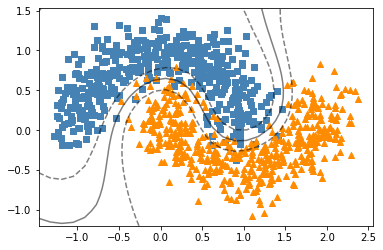

In [63]:
plt.scatter(
    X[y==0, 0],
    X[y==0, 1], 
    c=colors[0], 
    marker=markers[0]
)
plt.scatter(
    X[y==1, 0], 
    X[y==1, 1], 
    c=colors[1], 
    marker=markers[1]
)

model = SVC(C=10, kernel="rbf")
model.fit(X, y)

plot_svc_decision_function(model)

Visualizando a região de decisão

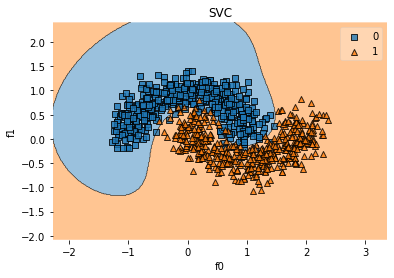

In [64]:
show_decision_region(
    X,
    y,
    model,
    "f0",
    "f1"
)

Cada kernel possui um conjunto de hiperparâmetros específicos:

- _linear_ $ \langle x, x'\rangle $: apenas $C$
- _poly_ (polinomial) $(\gamma \langle x, x' \rangle + r)^d$: parametros _gamma_ ($\gamma$), _degree_ ($d$), _coef0_ ($r$) e $C$
- _rbf_ (Radial Basis Function) $exp(-\gamma ||x-x'||^2)$: parametros _gamma_ ($\gamma$) e $C$
- _sigmoid_ (sigmóide) $tanh(\gamma \langle x, x' \rangle + r)$: parametros _gamma_ ($\gamma$), _coef0_ ($r$) e $C$

É imporatnte observar que o SVM é inerentemente um classificador linear e portanto, internamente ele utiliza _one-vs-all_ como padrão a partir da versão 0.19 do _sklearn_ e _one-vs-one_ para versões anteriores.